# Aproximación de Log 2 por Sumas de Riemann, MonteCarlo e Taylor


In [239]:
import numpy as np

ln2=np.log(2)
ln2

0.6931471805599453

## <span style="color:red"> Riemann <span>
https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/



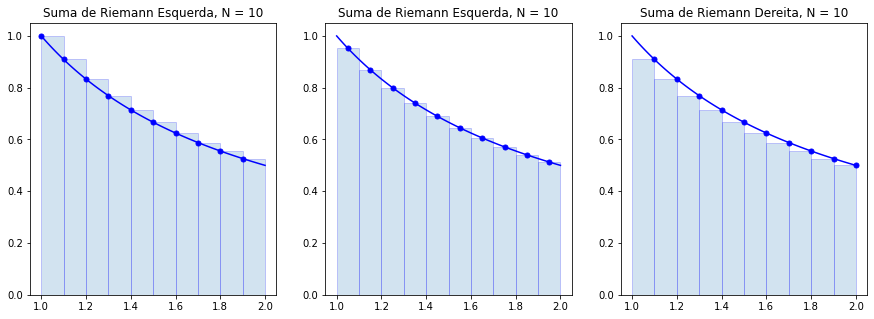

In [240]:
f = lambda x : 1/x
a = 1; b = 2; N = 10
n = 10 # Obtemos unha partición máis fina para debuxar a curva

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # puntos da esquerda
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Suma de Riemann Esquerda, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # punto central
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Suma de Riemann Esquerda, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # puntos da dereita
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Suma de Riemann Dereita, N = {}'.format(N))

plt.show()

<span style="font-weight:bold"> log2 $\approx\sum_{n=1}^{N}\Delta xi f( xi)$ </span>

In [241]:
sumaLeft, sumaCenter,sumaRight=0,0,0
for k in range(N):
    sumaLeft+=(1/N)*y_left[k]
    sumaCenter+=(1/N)*y_mid[k]
    sumaRight+=(1/N)*y_right[k]
sumaLeft, sumaCenter,sumaRight

(0.718771403175428, 0.6928353604099603, 0.6687714031754279)

In [242]:
print("Erros:")
"{:.2f}".format(abs(sumaLeft-log2)*100/ln2)+"%","{:.2f}".format(abs(sumaCenter-ln2)*100/ln2)+"%","{:.2f}".format(abs(sumaRight-ln2)*100/ln2)+"%"

Erros:


('3.70%', '0.04%', '3.52%')

## <span style="color:red">MonteCarlo<span>


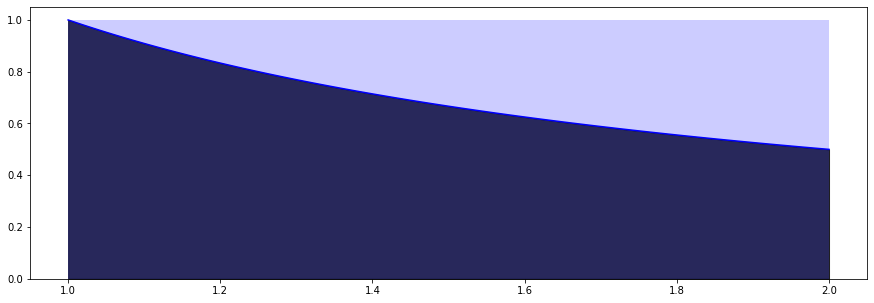

In [243]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(X,Y,'b')
ax.bar(1.5,1,width=1,alpha=0.2,color='blue')
ax.fill_between(X, 0, Y,alpha=0.8,color="black")

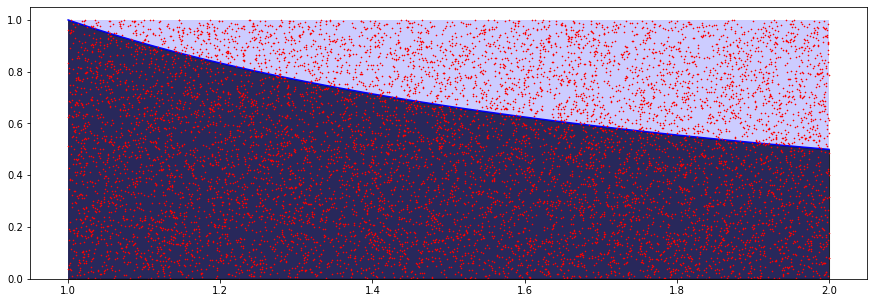

In [244]:
N=10000

x1=[np.random.random()+1 for _ in range(N)]
y1=[np.random.random() for _ in range(N)]
ax.plot(x1,y1,"x",color="r",markersize=1)
fig

In [245]:
sumaPuntos=0
for i in range(N):
    sumaPuntos+=1 if y1[i]<f(x1[i]) else 0
sumaPuntos

6918

<span style="font-weight:bold"> Área$\approx$PuntosSombra/PuntosTotais</span>

In [246]:
print("Aproximación e erro:")
sumaPuntos/N, "{:.4}".format(abs((sumaPuntos/N-ln2)*100/ln2))+"%"

Aproximación e erro:


(0.6918, '0.1944%')

## <span style="color:red">Serie de Taylor</span>
<span style="font-weight:bold; color:blue">ln(1+x)= $\sum_{n=1}^{\infty}\frac{(-1)^{n-1}x^{n}}{n} \Rightarrow$ <br>
ln2= $\sum_{n=1}^{\infty}\frac{(-1)^{n-1}}{n}\Rightarrow$ <br>
ln2$\approx\sum_{n=1}^{N}\frac{(-1)^{n-1}}{n}$ 
    <span style="font-weight:bold">

In [247]:
N=100

suma=0
for k in range(1,N):
    suma+=(-1)**(k-1)/k
print("Aproximación e erro:")
suma,"{:.4}".format(abs((suma-ln2)*100/ln2))+"%"

Aproximación e erro:


(0.698172179310195, '0.725%')